<a href="https://colab.research.google.com/github/Minach2002/sec/blob/master/speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch transformers librosa numpy pandas scikit-learn

import dependencies

In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
from IPython.display import Audio

In [5]:
import torchaudio
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import Wav2Vec2Model,Wav2Vec2Processor,Trainer,TrainingArguments,Wav2Vec2ForSequenceClassification
import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
import os

dataset_path = '/content/drive/My Drive/Tess-7/TESS'

paths = []
labels = []

for subfolder in os.listdir(dataset_path):
    subfolder_path = os.path.join(dataset_path, subfolder)

    if os.path.isdir(subfolder_path):

        for filename in os.listdir(subfolder_path):
            if filename.endswith('.wav'):
                file_path = os.path.join(subfolder_path, filename)
                paths.append(file_path)
                labels.append(subfolder)


print(f"Total files: {len(paths)}")
print(f"Sample paths: {paths[:5]}")
print(f"Sample labels: {labels[:5]}")



Total files: 2800
Sample paths: ['/content/drive/My Drive/Tess-7/TESS/sad/OAF_bite_sad.wav', '/content/drive/My Drive/Tess-7/TESS/sad/OAF_bar_sad.wav', '/content/drive/My Drive/Tess-7/TESS/sad/OAF_bean_sad.wav', '/content/drive/My Drive/Tess-7/TESS/sad/OAF_bath_sad.wav', '/content/drive/My Drive/Tess-7/TESS/sad/OAF_beg_sad.wav']
Sample labels: ['sad', 'sad', 'sad', 'sad', 'sad']


In [8]:
print(f"Sample labels: {labels[:5]}")

Sample labels: ['sad', 'sad', 'sad', 'sad', 'sad']


In [9]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/My Drive/Tess-7/TESS/sad/OAF_bi...,sad
1,/content/drive/My Drive/Tess-7/TESS/sad/OAF_ba...,sad
2,/content/drive/My Drive/Tess-7/TESS/sad/OAF_be...,sad
3,/content/drive/My Drive/Tess-7/TESS/sad/OAF_ba...,sad
4,/content/drive/My Drive/Tess-7/TESS/sad/OAF_be...,sad


In [10]:
df['label'].value_counts()

,count
label,
sad,400
angry,400
pleasant_surprised,400
neutral,400
happy,400
fear,400
disgust,400


Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

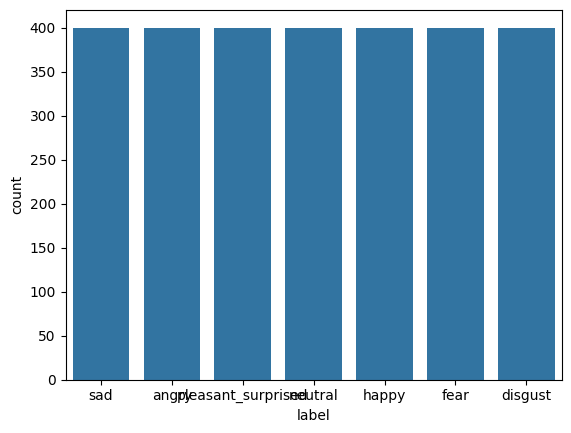

In [11]:
sns.countplot(data=df,x='label')

In [12]:

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

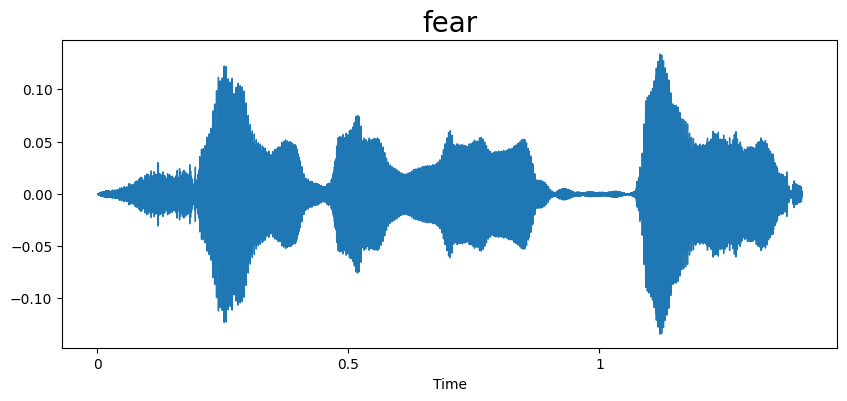

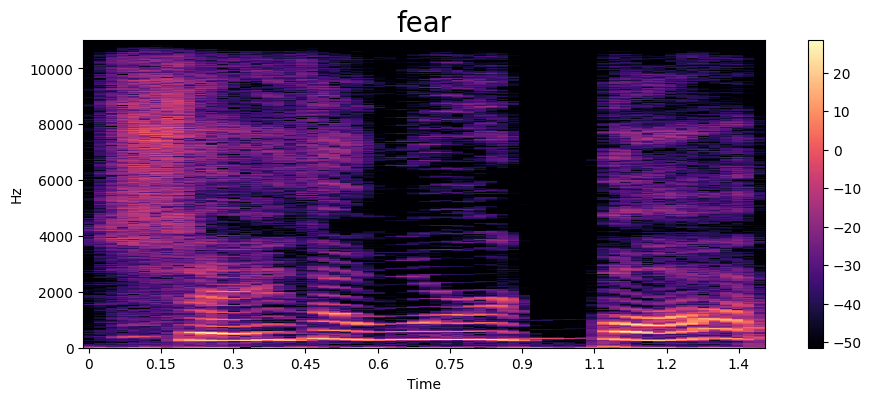

In [13]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

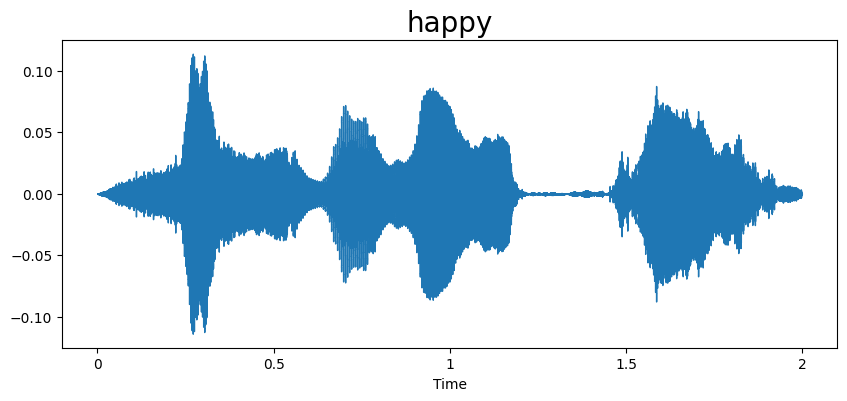

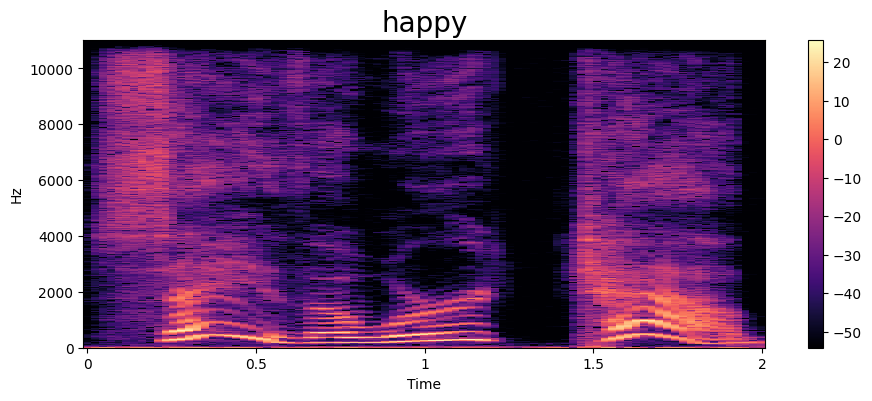

In [14]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


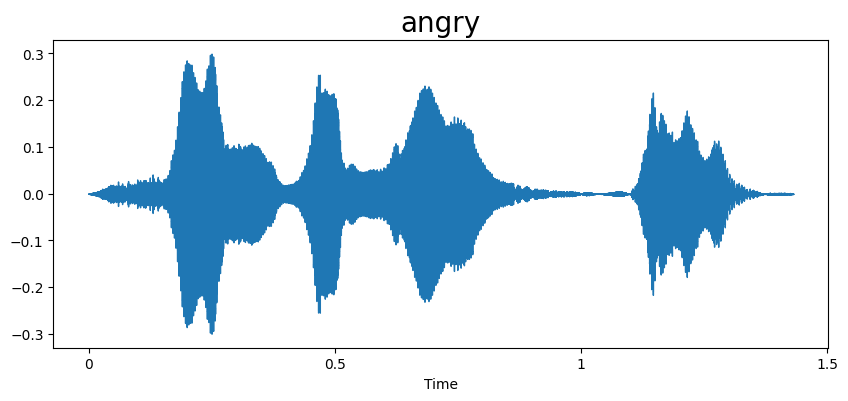

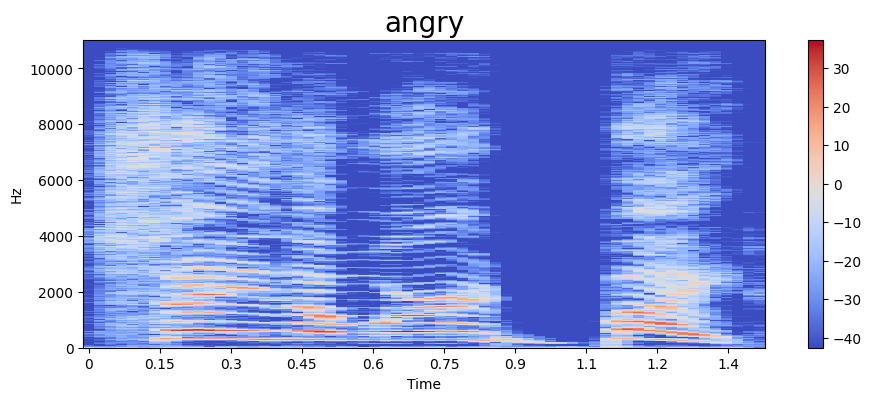

In [15]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


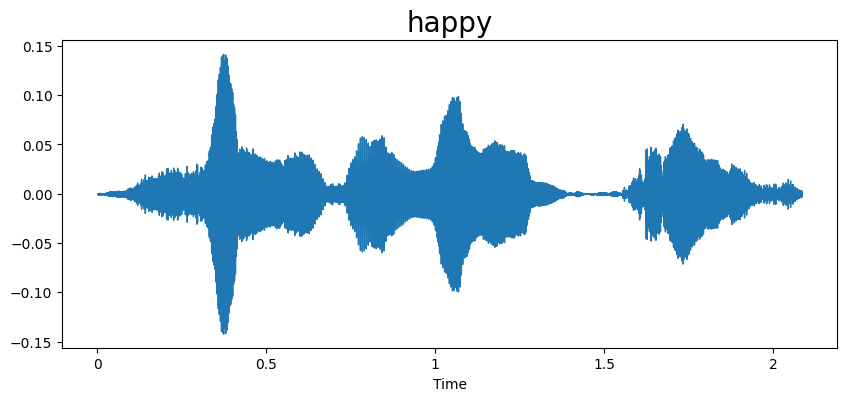

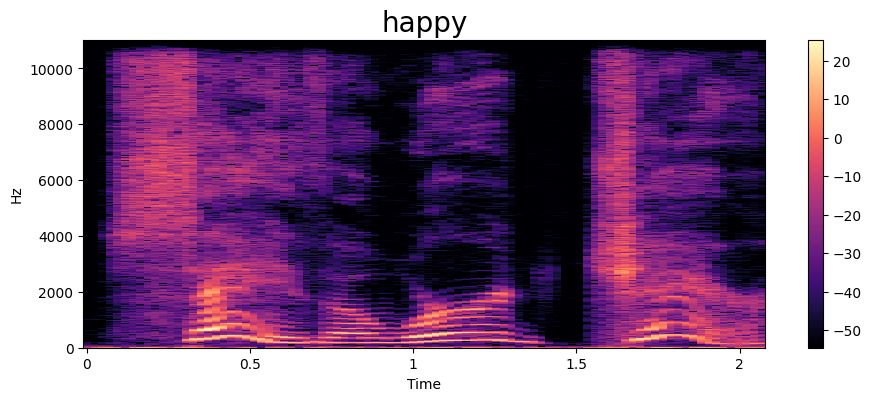

In [16]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)
